In [34]:
import numpy as np

In [4]:
import pandas as pd

df = pd.read_csv("data/kaggle_postings/postings.csv")
df.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0


In [6]:
df["description"][0]

'Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and communicate daily with ot

In [9]:
import fasttext
import fasttext.util
ft = fasttext.load_model('C:/Users/tempu/Documents/Code/job_tools/data/fasttext/cc.en.300.bin')

In [16]:
df_desc = df["description"][df["description"].notna()]

In [ ]:

df_train = df_desc.map(ft.get_word_vector)
dfn = np.stack(df_train.to_numpy(), axis=0)

In [7]:
from sklearn import cluster

In [94]:
n_cluster = [1000, 2000, 5000, 8000]
score = []
for ii in range(len(n_cluster)):
    model = cluster.KMeans(n_clusters=n_cluster[ii])
    model.fit(dfn)
    score.append(model.score(dfn))


KeyboardInterrupt: 

In [95]:
score

[-72.67459106445312, -65.40872192382812, -54.079071044921875]

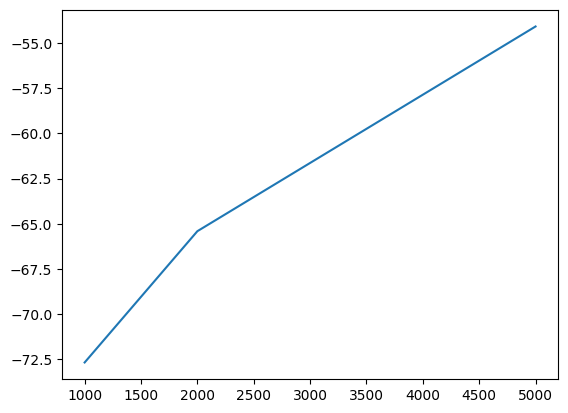

In [96]:
import matplotlib.pyplot as plt
plt.plot(n_cluster[0:3], score)

In [97]:
y_pred = model.predict(dfn[0:1000])

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [93]:
df["title"][0:1000][y_pred==35]

112         Architectural Designer
396      Legal Assistant Paralegal
639    Speech Language Pathologist
729                    Upholsterer
Name: title, dtype: object